### Notebook 2

Hello 4604 and 5604. Welcome to week two! 

In this notebook we will:

1. Get practice using and interpreting K-nearest neighbors
2. Learn how to tune a hyperparameter, which is an important skill for machine learning practitioners
3. Gain exposure to the scikit-learn API. Scikit-learn is a common toolkit for machine learning in Python

In [1]:
# To get started, please import the latest versions of numpy, pandas and sklearn
# You will also need to install and load matplotlib, a common Python plotting library

import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

# configure matplotlib to show plots in the notebook itself
%matplotlib inline 

### Data

In this notebook, we will be using the [Pima Indians Diabetes Dataset](https://www.kaggle.com/uciml/pima-indians-diabetes-database). The data consists of patient records with a number of features, along with a binary label indicating if the patient has diabetes or does not have diabetes. Note that "all patients here are females at least 21 years old of Pima Indian heritage." Note that the `outcome` variable records if a patient does or does not have diabetes.

In [2]:
df = pd.read_csv('diabetes.csv') #Load the dataset

# Let's go ahead and start with a two-dimensional dataset to build intuitions
low_dim = df[['Glucose', 'BloodPressure', "Outcome"]]

<AxesSubplot:xlabel='Glucose', ylabel='BloodPressure'>

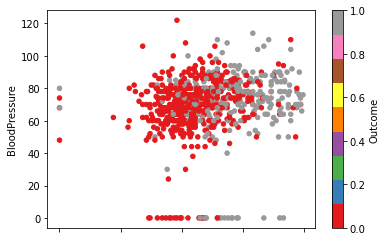

In [3]:
low_dim.plot.scatter(x='Glucose', y='BloodPressure', c="Outcome", colormap='Set1')

In [4]:
from sklearn.neighbors import KNeighborsClassifier

train = low_dim[0:700]
test = low_dim[700:]

In [5]:
from sklearn.neighbors import KNeighborsClassifier

out = []

for i in range(100):
    train_sampled = train.sample(n=700, replace=True)
    
    knn = KNeighborsClassifier(n_neighbors=3)

    knn.fit(X=train_sampled[['Glucose', 'BloodPressure']].to_numpy(), y=train_sampled["Outcome"].to_numpy())

    preds = knn.predict(X=test[['Glucose', 'BloodPressure']].to_numpy())
    
    out.append(preds)

In [6]:
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html

In [10]:
bootstrap_pred = np.mean(np.stack(out),axis=0) > .5
bootstrap_pred = preds.astype(int)

In [11]:
bootstrap_pred == train_sampled["Outcome"].to_numpy()

<ipython-input-11-b8b24f501094>:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  bootstrap_pred == train_sampled["Outcome"].to_numpy()


False

In [14]:
real = test["Outcome"].to_numpy()
np.mean(bootstrap_pred == real)



0.7205882352941176

In [15]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X=train[['Glucose', 'BloodPressure']].to_numpy(), y=train["Outcome"].to_numpy())
regular_pred = knn.predict(X=test[['Glucose', 'BloodPressure']].to_numpy())
np.mean(regular_pred == real)

0.7058823529411765